# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
city_df = pd.read_csv(output_data_file)
# latitudes and longitudes range
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
city_df

,Unnamed: 0,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,Glenwood Springs,US,39.55,-107.32,41.00,73,1,26.40,1605313570
1,1,Tasiilaq,GL,65.61,-37.64,19.40,57,99,4.70,1605313864
2,2,Sitka,US,57.05,-135.33,39.20,86,75,3.36,1605313864
3,3,Óbidos,BR,-1.92,-55.52,77.52,85,47,3.40,1605313864
4,4,Ponta Delgada,PT,37.73,-25.67,62.60,88,20,4.70,1605313730
...,...,...,...,...,...,...,...,...,...,...
574,574,Hibbing,US,47.43,-92.94,26.60,68,1,6.93,1605314024
575,575,Kismayo,SO,-0.36,42.55,78.89,79,0,6.49,1605314025
576,576,Saint-Augustin,CA,51.23,-58.65,33.13,84,15,4.05,1605314025
577,577,Carmo do Rio Claro,BR,-20.97,-46.12,70.27,83,99,0.60,1605313924


In [4]:
city_df.head()

,Unnamed: 0,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,Glenwood Springs,US,39.55,-107.32,41.00,73,1,26.40,1605313570
1,1,Tasiilaq,GL,65.61,-37.64,19.40,57,99,4.70,1605313864
2,2,Sitka,US,57.05,-135.33,39.20,86,75,3.36,1605313864
3,3,Óbidos,BR,-1.92,-55.52,77.52,85,47,3.40,1605313864
4,4,Ponta Delgada,PT,37.73,-25.67,62.60,88,20,4.70,1605313730


In [5]:
citipy

<module 'citipy.citipy' from 'C:\\Users\\nagen\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>

In [6]:
city_df=city_df.append(city_df)
new_city_df=city_df.reset_index()
new_city_df

,index,Unnamed: 0,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,0,Glenwood Springs,US,39.55,-107.32,41.00,73,1,26.40,1605313570
1,1,1,Tasiilaq,GL,65.61,-37.64,19.40,57,99,4.70,1605313864
2,2,2,Sitka,US,57.05,-135.33,39.20,86,75,3.36,1605313864
3,3,3,Óbidos,BR,-1.92,-55.52,77.52,85,47,3.40,1605313864
4,4,4,Ponta Delgada,PT,37.73,-25.67,62.60,88,20,4.70,1605313730
...,...,...,...,...,...,...,...,...,...,...,...
1153,574,574,Hibbing,US,47.43,-92.94,26.60,68,1,6.93,1605314024
1154,575,575,Kismayo,SO,-0.36,42.55,78.89,79,0,6.49,1605314025
1155,576,576,Saint-Augustin,CA,51.23,-58.65,33.13,84,15,4.05,1605314025
1156,577,577,Carmo do Rio Claro,BR,-20.97,-46.12,70.27,83,99,0.60,1605313924


## Generate Cities List

In [7]:
#give values to cities and lat_lngs
lat_lngs = []
cities = []

# generate random float between [min_lng, max_lng)
lngs = np.random.uniform(-180.00, 180.00, size=1500)
# generate random float between [min_lat, max_lat)
lats = np.random.uniform(-90.00, 90.00, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# nearest city checking for each latitude and longitude combination
for lat_lng in lat_lngs:
    nearest_city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   # If the city is unique, then add it to cities list
    if nearest_city not in cities:
        cities.append(nearest_city)

# Print the city count 
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Create Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=a8b6f82e167e34f5157b2d24279d79f7&units=imperial&q='

In [10]:
# lists setup
place = []
lats = []
lngs = []
temperature = []
humid = []
cloud = []
wind = []
country = []
date_time = []

#individual city and city_set (50 records per set) variables 
item = 1
city_set = 1

#Looping through cities in the cities list
for city in cities:

    #for items 1 to 50
    if item < 50:
        try:
            result = requests.get(query_url + city).json()
            #Each Processed city will get an item number, even if it is not found.
            print(f"Processing {city} Number {item} in Set {city_set}.")
            item = item + 1
            #Appending relevant information to the correct list
            place.append(result['name'])
            lats.append(result['coord']['lat'])
            lngs.append(result['coord']['lon'])
            temperature.append(result['main']['temp_max'])
            humid.append(result['main']['humidity'])
            cloud.append(result['clouds']['all'])
            wind.append(result['wind']['speed'])
            country.append(result['sys']['country'])
            date_time.append(result['dt'])
                    
        except:
            print(f"{city} not found. Skipping.")
    
    else:
        #  item count reset
        item = 1
        #add one to the city_set count
        city_set = + 1
        #pause API pull for 5 seconds and then continue
        time.sleep(5)
            

Processing faya Number 1 in Set 1.
Processing tasiilaq Number 2 in Set 1.
Processing mandalgovi Number 3 in Set 1.
Processing taolanaro Number 4 in Set 1.
taolanaro not found. Skipping.
Processing mataura Number 5 in Set 1.
Processing riyadh Number 6 in Set 1.
Processing yellowknife Number 7 in Set 1.
Processing neiafu Number 8 in Set 1.
Processing chuy Number 9 in Set 1.
Processing bredasdorp Number 10 in Set 1.
Processing port alfred Number 11 in Set 1.
Processing martapura Number 12 in Set 1.
Processing bambanglipuro Number 13 in Set 1.
Processing zadar Number 14 in Set 1.
Processing qaanaaq Number 15 in Set 1.
Processing avarua Number 16 in Set 1.
Processing lebu Number 17 in Set 1.
Processing atuona Number 18 in Set 1.
Processing punta arenas Number 19 in Set 1.
Processing ushuaia Number 20 in Set 1.
Processing srednekolymsk Number 21 in Set 1.
Processing liverpool Number 22 in Set 1.
Processing belushya guba Number 23 in Set 1.
belushya guba not found. Skipping.
Processing dikson

Processing uba Number 49 in Set 1.
Processing tsihombe Number 1 in Set 1.
tsihombe not found. Skipping.
Processing beni suef Number 2 in Set 1.
Processing spencer Number 3 in Set 1.
Processing general roca Number 4 in Set 1.
Processing esperance Number 5 in Set 1.
Processing russell Number 6 in Set 1.
Processing roald Number 7 in Set 1.
Processing shieli Number 8 in Set 1.
Processing port elizabeth Number 9 in Set 1.
Processing meiganga Number 10 in Set 1.
Processing grand river south east Number 11 in Set 1.
grand river south east not found. Skipping.
Processing barentsburg Number 12 in Set 1.
barentsburg not found. Skipping.
Processing portland Number 13 in Set 1.
Processing port hardy Number 14 in Set 1.
Processing vestmannaeyjar Number 15 in Set 1.
Processing port augusta Number 16 in Set 1.
Processing kishi Number 17 in Set 1.
Processing contamana Number 18 in Set 1.
Processing carnarvon Number 19 in Set 1.
Processing yar-sale Number 20 in Set 1.
Processing bowen Number 21 in Set 

Processing nizhneyansk Number 47 in Set 1.
nizhneyansk not found. Skipping.
Processing darnah Number 48 in Set 1.
Processing camacha Number 49 in Set 1.
Processing liaqatabad Number 1 in Set 1.
Processing moree Number 2 in Set 1.
Processing muisne Number 3 in Set 1.
Processing san policarpo Number 4 in Set 1.
Processing dzilam gonzalez Number 5 in Set 1.
Processing prabumulih Number 6 in Set 1.
Processing watsa Number 7 in Set 1.
Processing kodinsk Number 8 in Set 1.
Processing mehran Number 9 in Set 1.
Processing repino Number 10 in Set 1.
Processing tigil Number 11 in Set 1.
Processing tessalit Number 12 in Set 1.
Processing hofn Number 13 in Set 1.
Processing sorland Number 14 in Set 1.
Processing severnyy Number 15 in Set 1.
Processing huarmey Number 16 in Set 1.
Processing gorontalo Number 17 in Set 1.
Processing bismarck Number 18 in Set 1.
Processing lufilufi Number 19 in Set 1.
Processing wewak Number 20 in Set 1.
Processing langenburg Number 21 in Set 1.
Processing bor Number 

Processing pedasi Number 49 in Set 1.
Processing trinidad Number 1 in Set 1.
Processing sidi ali Number 2 in Set 1.
Processing vilhena Number 3 in Set 1.
Processing porbandar Number 4 in Set 1.
Processing bwanga Number 5 in Set 1.
Processing kourou Number 6 in Set 1.
Processing smithers Number 7 in Set 1.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#Create city weather info dataframe
city_weather_info_df = pd.DataFrame({"City":place,
                                "Country": country,
                                "Lat": lats,
                                "Long": lngs,
                                "Max Temp": temperature,
                                "Humidity": humid,
                                "Cloudiness": cloud,
                                "Wind Speed": wind,
                                "Date": date_time})
city_weather_info_df

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Faya,SA,18.39,42.45,59.00,50,0,1.05,1605316808
1,Tasiilaq,GL,65.61,-37.64,19.40,52,99,3.36,1605316808
2,Mandalgovi,MN,45.76,106.27,30.90,76,0,5.48,1605316808
3,Mataura,NZ,-46.19,168.86,69.01,51,100,13.00,1605316808
4,Riyadh,SA,24.69,46.72,62.60,67,0,5.82,1605316642
...,...,...,...,...,...,...,...,...,...
552,Vilhena,BR,-12.74,-60.15,70.30,85,1,4.54,1605316934
553,Porbandar,IN,21.64,69.61,75.85,50,0,9.31,1605316934
554,Bwanga,TZ,-3.03,31.76,62.67,93,41,1.68,1605316934
555,Kourou,GF,5.16,-52.65,78.80,100,100,2.24,1605316934


In [12]:
city_weather_info_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,19.148474,19.260808,56.218456,77.113106,48.443447,7.233106,1.605317e+09
std,33.680976,90.000731,25.145193,17.334099,41.505644,5.214179,6.351387e+01
min,-54.800000,-179.170000,-20.250000,7.000000,0.000000,0.540000,1.605317e+09
25%,-7.950000,-57.560000,39.200000,69.000000,1.000000,3.360000,1.605317e+09
50%,20.790000,22.460000,64.400000,82.000000,40.000000,5.880000,1.605317e+09
75%,49.030000,98.780000,76.870000,90.000000,93.000000,9.620000,1.605317e+09
max,78.220000,177.480000,96.800000,100.000000,100.000000,28.860000,1.605317e+09


In [14]:
#Save dataframe to csv
city_weather_info_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
humidity_df=city_weather_info_df.loc[city_weather_info_df['Humidity'] > 100]
humidity_df


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_weather_info_df


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Glenwood Springs,US,39.55,-107.32,41.00,73,1,26.40,1605313570
1,Tasiilaq,GL,65.61,-37.64,19.40,57,99,4.70,1605313864
2,Sitka,US,57.05,-135.33,39.20,86,75,3.36,1605313864
3,Óbidos,BR,-1.92,-55.52,77.52,85,47,3.40,1605313864
4,Ponta Delgada,PT,37.73,-25.67,62.60,88,20,4.70,1605313730
...,...,...,...,...,...,...,...,...,...
574,Hibbing,US,47.43,-92.94,26.60,68,1,6.93,1605314024
575,Kismayo,SO,-0.36,42.55,78.89,79,0,6.49,1605314025
576,Saint-Augustin,CA,51.23,-58.65,33.13,84,15,4.05,1605314025
577,Carmo do Rio Claro,BR,-20.97,-46.12,70.27,83,99,0.60,1605313924


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

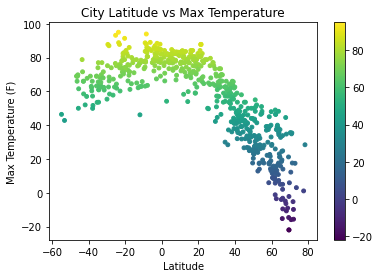

In [21]:
#Scatter plot for Latitude vs. Temperature
#set x and y axis values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Max Temp"]

# scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Temp.png")

## Latitude vs. Humidity Plot

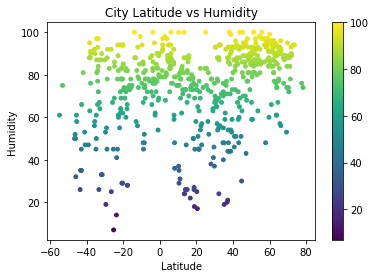

In [87]:
#Scatter plot for Latitude vs. Humidity
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Humidity"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_humidity.png")

## Latitude vs. Cloudiness Plot

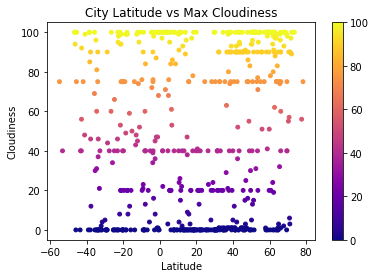

In [86]:
#Scatter plot for Latitude vs. Temperature
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Cloudiness"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "plasma")
plt.colorbar()
plt.title("City Latitude vs Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Cloudiness.png")

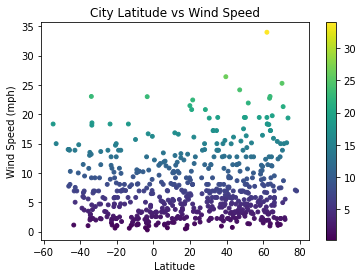

In [85]:
#Scatter plot for Latitude vs. Windspeed 
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Wind Speed"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [40]:
#Find the Northern Hemisphere cities
northern_HS_df = city_weather_info_df.loc[city_weather_info_df["Lat"] > 0]
northern_HS_df



,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Glenwood Springs,US,39.55,-107.32,41.00,73,1,26.40,1605313570
1,Tasiilaq,GL,65.61,-37.64,19.40,57,99,4.70,1605313864
2,Sitka,US,57.05,-135.33,39.20,86,75,3.36,1605313864
4,Ponta Delgada,PT,37.73,-25.67,62.60,88,20,4.70,1605313730
8,Camacha,PT,33.08,-16.33,69.80,94,40,12.75,1605313866
...,...,...,...,...,...,...,...,...,...
572,Belyy,RU,55.84,32.94,28.15,97,51,4.29,1605314024
573,Tevriz,RU,57.51,72.40,22.17,97,100,5.14,1605314024
574,Hibbing,US,47.43,-92.94,26.60,68,1,6.93,1605314024
576,Saint-Augustin,CA,51.23,-58.65,33.13,84,15,4.05,1605314025


The r-value is -0.8868219075584179


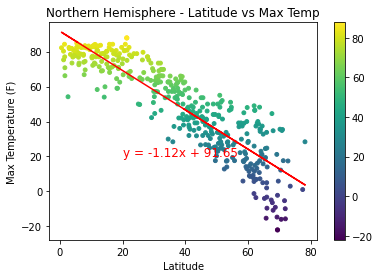

In [49]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Max Temp"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Temp.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
#Find the Southern Hemisphere cities
southern_HS_df = city_weather_info_df[city_weather_info_df["Lat"] < 0]
southern_HS_df


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
3,Óbidos,BR,-1.92,-55.52,77.52,85,47,3.40,1605313864
5,Port Alfred,ZA,-33.59,26.89,67.96,72,0,18.54,1605313865
6,Tadine,NC,-21.55,167.88,78.39,72,53,5.73,1605313865
7,East London,ZA,-33.02,27.91,69.89,87,0,6.58,1605313865
9,Punta Arenas,CL,-53.15,-70.92,42.80,75,40,14.99,1605313866
...,...,...,...,...,...,...,...,...,...
548,Paracuru,BR,-3.41,-39.03,81.00,76,16,23.00,1605314022
557,Namatanai,PG,-3.67,152.43,85.30,70,40,7.43,1605314023
561,Mitsamiouli,KM,-11.38,43.28,78.46,78,95,1.63,1605314023
575,Kismayo,SO,-0.36,42.55,78.89,79,0,6.49,1605314025


The r-value is 0.6078615518556235


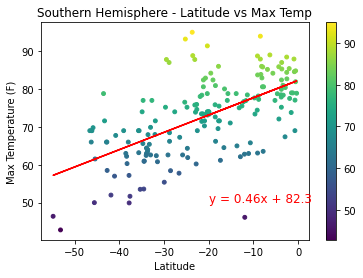

In [51]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Max Temp"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3008397025229085


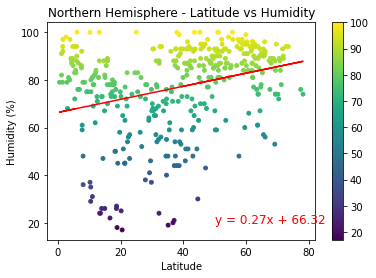

In [53]:
#Linear regression model for Latitude vs Humidity

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Humidity"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.27909919863113203


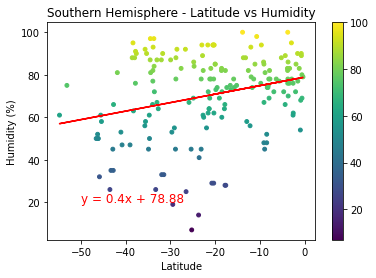

In [55]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Humidity"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.2589276533813316


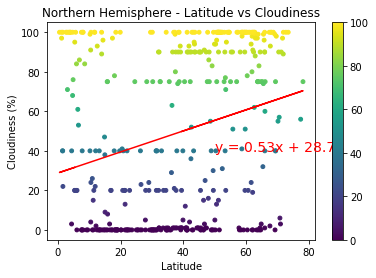

In [83]:
#Linear regression model for Latitude vs Humidity

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Cloudiness"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=14,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.00930045812638046


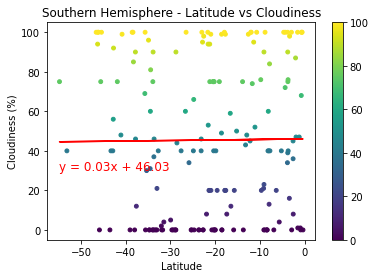

In [77]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Cloudiness"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00930045812638046


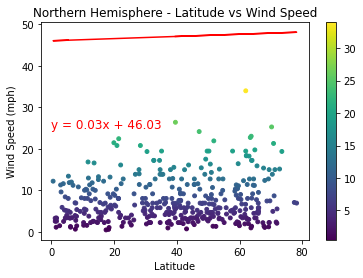

In [78]:
#Linear regression model for Latitude vs Humidity

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Wind Speed"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.00930045812638046


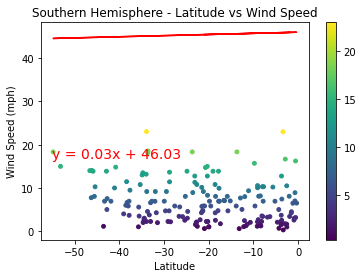

In [84]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Wind Speed"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=14,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Wind.png")